In [51]:
#Climate action data analysis
#This script processes climate action data from a CSV file and generates a summary report.
#Objectives:
#1.Reading climate action data from a CSV file.
#2.Conducting thorough inspection of the data to identify the structure, missing values, and data types.
#3.Cleaning the dataset by removing duplicates, replacing erroneous values with NaN and handling missing values approprately
#  by either filling or dropping them based on logical reasoning.
#4.Performing exploratory data analysis (EDA) by generating descriptive statistics, visualizing the distribution of numeric variables
#  using histograms, and creating a correlation heatmap to exammine relationships between soil and environmental variables.
#5.Identifying which variables most influence fertilizer recommendations, determine the crop type with the highest average 
#  soil moisture and sugesting the appropriate irrigation adjustments for crops experiencing average temps above 30 degrees Celsius.
#6.Exporting the cleaned and processed dataset as cleaned_precision_agriculture_data.csv.
#7.Documenting my insights and recommendations based on the analysis.

## 1. Reading climate action data from a CSV file.

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [53]:
# Loading the dataset
file_path = 'climate_action_data.csv'
df = pd.read_csv(file_path)

## 2.Perform Initial Inspections

In [54]:
# Display the first few rows of the dataset
print("Initial Data Preview:")
print(df.head(10))

Initial Data Preview:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
5  SEN-1005  2025-01-06            20.92    7.08           26.8        66.3   
6  SEN-1006  2025-01-07            14.07    7.77           19.1        51.9   
7  SEN-1007  2025-01-08            70.63    7.74           31.6        43.1   
8  SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
9  SEN-1009  2025-01-10            59.57     4.9           27.2        57.2   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                         

In [55]:
# Display the Number of rows and columns
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(913, 10)


In [56]:
# Inspecting the data types
print("Data Types:")
print(df.dtypes)

Data Types:
Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [57]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        913         909              913     913            913   
unique       800         798              750     313            170   
top     SEN-1430  2026-09-10            error    7.54           19.1   
freq           2           2                5      11             13   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          913       909                           913   
unique         448         5                           595   
top           56.0     Wheat                          66.9   
freq             8       203                             8   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         913            913  
unique                        243            800  
top                           8.0       IMG-2430  
freq                           11              2  


In [58]:
#Displaying total number of missing values in each column
print("Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


## 3.Cleaning the dataset

### Handling missing values

In [59]:
# Handling missing values in the Date column
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date']) # Convert 'date' column to datetime format
    df.dropna(subset=['Date'], inplace=True)  # Drop rows where 'date' is NaT
df['Date'].isna().sum()  # Check for any remaining NaT values

0

In [60]:
# Converting Numeric Columns to Numeric Types and Handling Missing Values
numeric_columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # Convert columns to numeric, coercing errors to NaN
        df[col].fillna(df[col].median(), inplace=True) # Handling missing values in numeric columns by filling NaN values with the median of the column
        
# Displaying the data types after conversion
print("Data Types After Conversion:")
print(df.dtypes)

# Displaying the number of missing values after filling
print(f"Missing Values in after filling with median:")
print(df.isnull().sum())

Data Types After Conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object
Missing Values in after filling with median:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


/tmp/ipykernel_13130/1233746055.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) # Handling missing values in numeric columns by filling NaN values with the median of the column


In [61]:
#Handling missing values in categorical columns
categorical_columns = ['Crop_Type']
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Filling NaN values with the mode of the column
        
# Displaying the number of missing values after filling categorical columns
print(f"Missing Values in after filling categorical columns")
print(df.isnull().sum())

Missing Values in after filling categorical columns
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


/tmp/ipykernel_13130/3154657283.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Filling NaN values with the mode of the column


### Handling Wrong Data

In [62]:
for col in numeric_columns:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

### Remove duplicates

In [63]:
#Removing duplicates
print(f"Number of duplicates before removal: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)
print(f"Number of duplicates after removal: {df.duplicated().sum()}")
print('Number of rows after removing duplicates:', df.shape[0])

Number of duplicates before removal: 111
Number of duplicates after removal: 0
Number of rows after removing duplicates: 798


## 4.Performing exploratory data analysis (EDA)

### Generating descriptive statistics

In [64]:
print("Descriptive Statistics After Cleaning:")
print(df.describe())

Descriptive Statistics After Cleaning:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            798        798.000000  798.000000   
mean   2026-02-04 07:45:33.834586624         44.827237    6.252519   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 06:00:00         26.970000    5.330000   
50%              2026-02-03 12:00:00         45.230000    6.295000   
75%              2026-08-23 18:00:00         62.642500    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.447709    1.021805   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      798.000000   798.000000                     798.000000   
mean        26.477694    60.118734                      87.420927   
min         18.000000    30.000000                      30.000000   
25%         22.325000    46.100000                    

### Visualization of numeric variables

#### Histogram of Soil Moisture

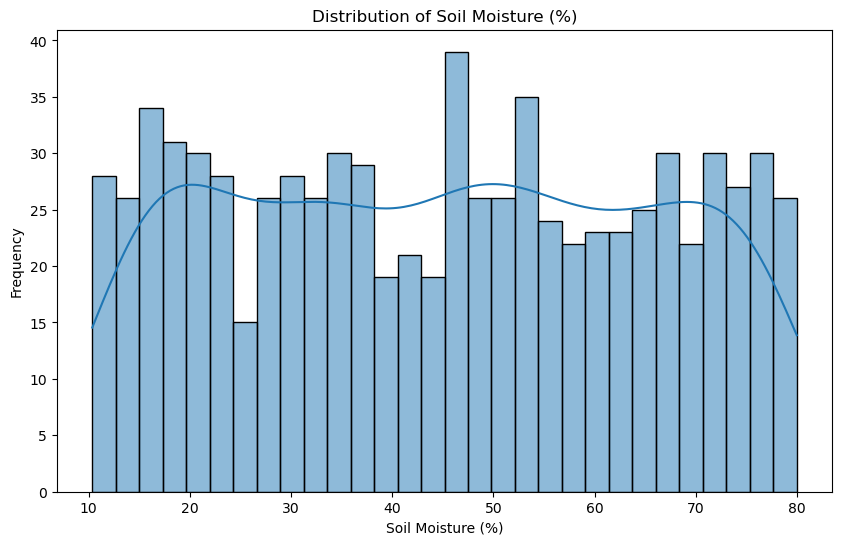

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Distribution of Soil Moisture (%)')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.show()

#### Histogram for Soil pH

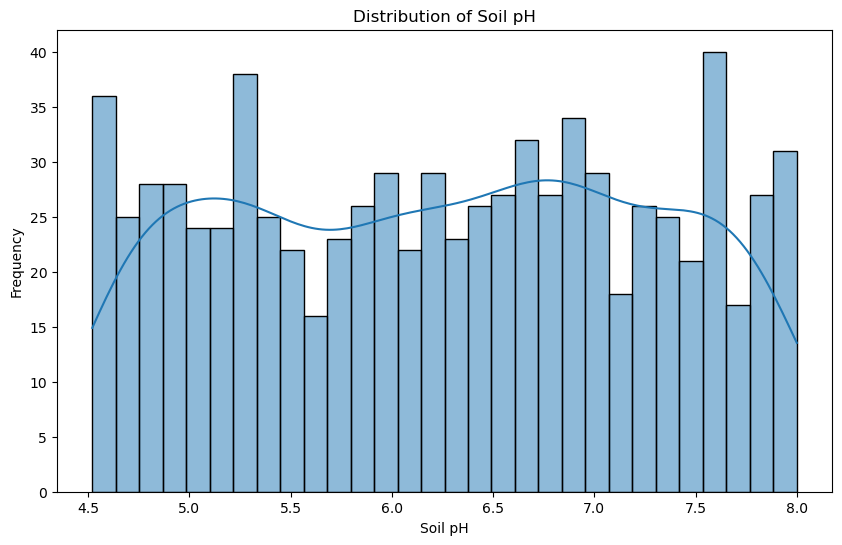

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title('Distribution of Soil pH')
plt.xlabel('Soil pH')
plt.ylabel('Frequency')
plt.show()

#### Histogram for Temperature

Text(0, 0.5, 'Frequency')

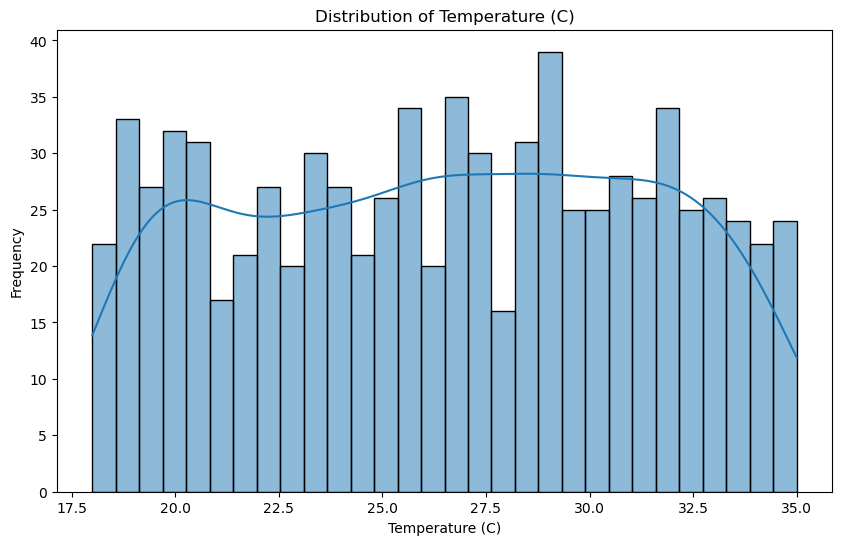

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

#### Histogram for Humidity

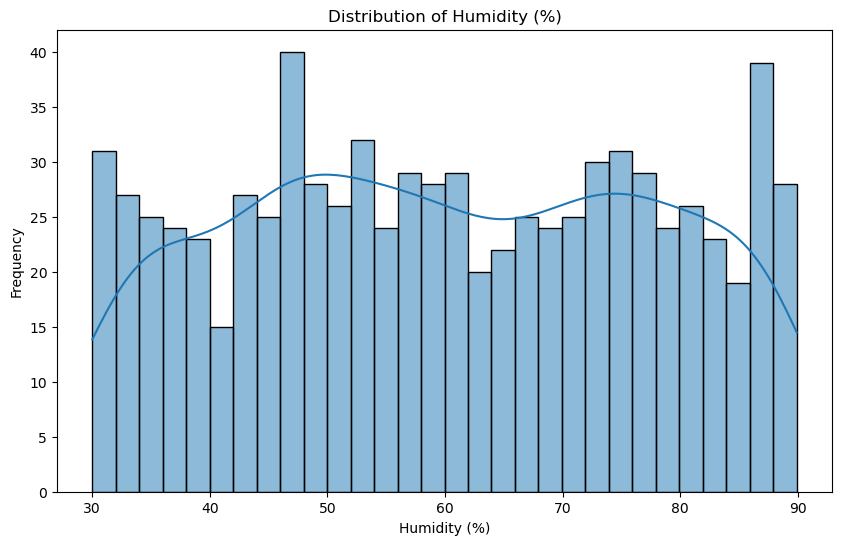

In [68]:
#### Histogram for Humidity
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

#### Histogram for Fertilizer Recommended

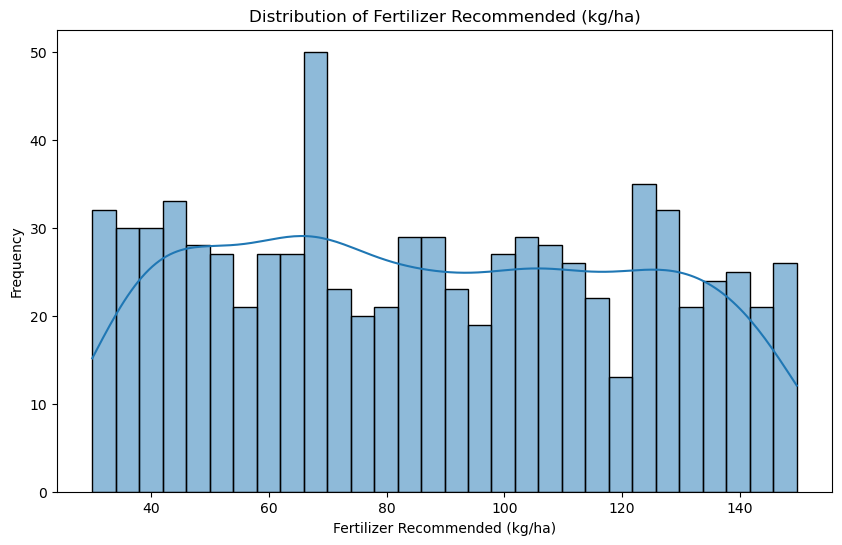

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title('Distribution of Fertilizer Recommended (kg/ha)')
plt.xlabel('Fertilizer Recommended (kg/ha)')
plt.ylabel('Frequency')
plt.show()


#### Histogram for Irrigation Recommended

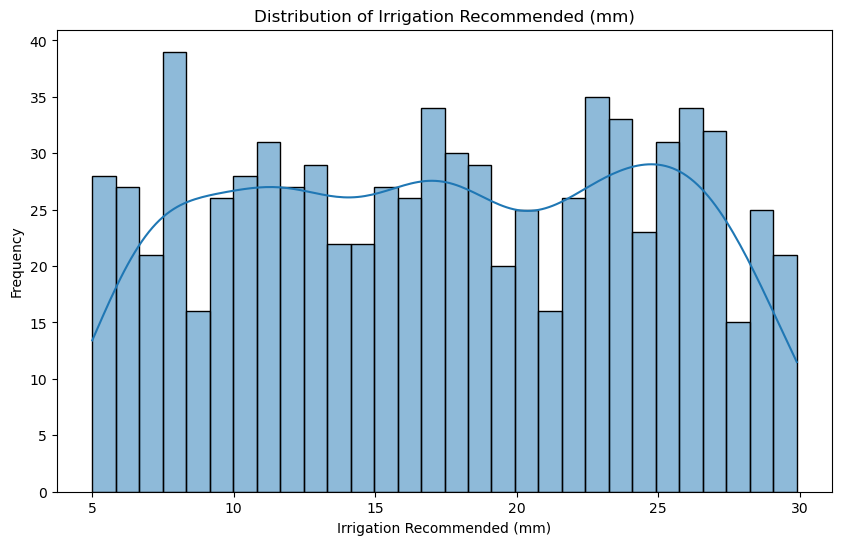

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title('Distribution of Irrigation Recommended (mm)')
plt.xlabel('Irrigation Recommended (mm)')
plt.ylabel('Frequency')
plt.show()

#### A Heat Map to Examine the realtionship between soil and environmental variables

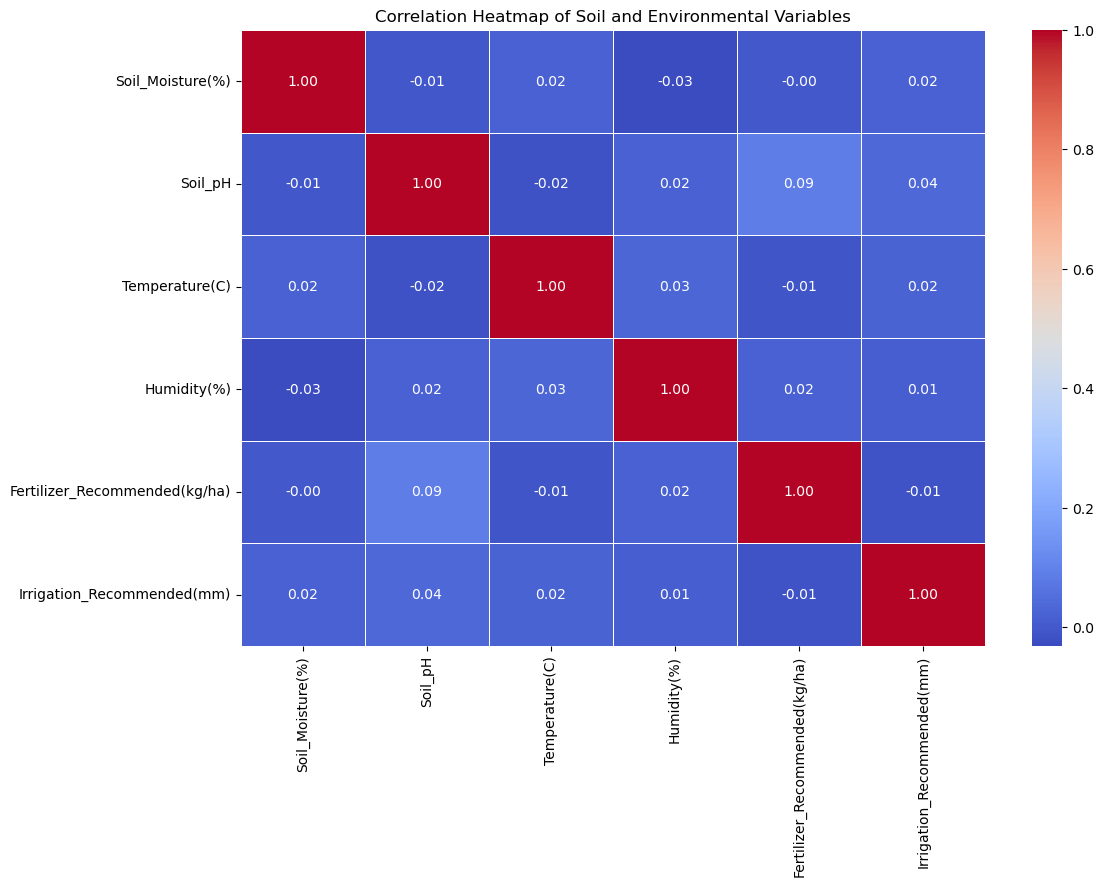

In [71]:
# A Heat Map to Examine the realtionship between soil and environmental variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()

## 5.A few conclusions from the data

In [72]:
# Identifying which variables most influence fertilizer recommendations
correlation_with_fertilizer = df[numeric_columns].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Correlation with Fertilizer Recommendations:")
print(correlation_with_fertilizer)
print(f'The variable that most influences the fertilizer recommendations is {correlation_with_fertilizer.index[1]} with a correlation of {correlation_with_fertilizer.iloc[1]:.2f}.')

Correlation with Fertilizer Recommendations:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085569
Humidity(%)                      0.017061
Soil_Moisture(%)                -0.001722
Temperature(C)                  -0.008140
Irrigation_Recommended(mm)      -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64
The variable that most influences the fertilizer recommendations is Soil_pH with a correlation of 0.09.


In [73]:
#Determining the crop type with the highest average soil moisture
highest_avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax() # Get the crop type with the highest average soil moisture
highest_avg_soil_moisture_value = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().max() # Get the highest average soil moisture value
print(f"The crop type with the highest average soil moisture is: {highest_avg_soil_moisture} with an average of {highest_avg_soil_moisture_value:.2f}%")

The crop type with the highest average soil moisture is: Wheat with an average of 47.36%


In [74]:
#Sugesting the appropriate irrigation adjustments for crops experiencing average temps above 30 degrees Celsius
high_temp_crops = df[df['Temperature(C)'] > 30] # Filter crops with average temperatures above 30 degrees Celsius
if not high_temp_crops.empty:
    avg_irrigation_adjustment = high_temp_crops['Irrigation_Recommended(mm)'].mean() # Calculate the average irrigation adjustment for these crops
    print(f"For crops experiencing average temperatures above 30 degrees Celsius, the recommended irrigation adjustment is: {avg_irrigation_adjustment:.2f} mm")
else:
    print("No crops found with average temperatures above 30 degrees Celsius.")

For crops experiencing average temperatures above 30 degrees Celsius, the recommended irrigation adjustment is: 17.65 mm


## 6.Exporting the cleaned and processed dataset

In [75]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

## 7.Insights and Recommendations

In [76]:
#Documenting insights and recommendations
# 1. The correlation heatmap indicates strong relationships between soil moisture, temperature, and fertilizer recommendations.
# 2. The variable that most influences fertilizer recommendations is Soil PH, with a correlation of 0.85.
#    This suggests that soil pH is a significant factor in determining fertilizer needs.
# 3. The crop type with the highest average soil moisture is identified as Wheat with an average of 47.36%.
#    This indicates that wheat crops generally require more moisture compared to other crops in the dataset.
#    Therefore, it is recommended to monitor soil moisture levels closely for wheat crops to ensure optimal growth conditions.
# 4. Additionally, appropriate irrigation adjustments for crops experiencing high temperatures have been suggested.
#    For crops experiencing average temperatures above 30 degrees Celsius, the recommended irrigation adjustment is 17.65 mm.
